# HOUSE SALES IN KING COUNTY, USA

- **COMPANY:** House Rocket.


- **BUSINESS MODEL:** Buy houses at a low price and review at the highest price.


- **WHAT'S THE CHALLENGE:** Finding good deals within the available portfolio, that is, finding homes with a low price, in a great location and that have a great resale potential for a higher price.


- **DATA:** This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


- **SOURCE:** https://www.kaggle.com/harlfoxem/housesalesprediction


## CEO'S REQUESTS FOR YOU:

### FIRST MEETING REQUESTS:

**1.** What is the date of the oldest property in the portfolio?

**2.** How many properties have the maximum number of floors?

**3.** Create a classification for the properties, separating them into low and high standard, according to price.
- Above BRL 540,000 -> high standard
- Below BRL 540,000 -> low standard

**4.** I would like a report ordered by price and containing the following information:
- property id,
- date the property became available for purchase,
- the number of rooms,
- the total size of the terrain,
- the price,
- the classification of the property (high and low standard)

**5.** I would like a Map indicating where the houses are located by geography.


### SECOND MEETING REQUESTS:

**1.** How many properties per level?
- Level 0 -> Price between BRL 0 and BRL 321,950
- Level 1 -> Price between BRL 321,950 and BRL 450,000
- Level 2 -> Price between BRL 450,000 and BRL 645,000
- Level 3 -> Above BRL 645,000

**2.** Add the following information to the property:
- The name of the street
- Property number
- The name of the neighborhood
- The name of the city
- The name of the state

**3.** Add the Level of properties on the Map as a Color

**4.** Add the Property Price as the point size on the map

**5.** Add filter options so I can do my own analysis:
- I want to choose to view properties with a water view or not.
- I want to filter properties down to a certain price value.

**6.** Add filter options in the last dashboard sent: only view value from a date available for purchase.


### THIRD MEETING REQUESTS:

**1.** What is the number of properties per year of construction?

**2.** What is the smallest number of rooms per year of building construction?

**3.** What is the highest purchase price for each number of rooms?

**4.** What is the sum of all purchase prices for each number of rooms?

**5.** What is the sum of all purchase prices by the number of bedrooms and bathrooms?

**6.** What is the average room size of the buildings per year of construction?

**7.** What is the median room size of the buildings per year of construction?

**8.** What is the standard deviation of room size in buildings per year of construction?

**9.** How is the average growth in real estate purchase prices, by day and week of the year?

**10.** I would like to look at the map and be able to identify the houses with the highest price.


### FOURTH MEETING REQUEST:

**1.** I want to access the map and dashboard from my mobile phone.


### FIFTH MEETING REQUEST:

I would like to arrive at my desk in the morning and have a unique place where I can look at the House Rocket portfolio. In that portfolio, I'm interested in:

**1.** Filters properties by one or multiple regions.

**2.** Choose one or more variables to view.

**3.** Note the total number of properties, the average price, the average living room and also the average price per square meter in each of the zip codes.

**4.** Analyze each of the columns in a more described way.

**5.** A map with portfolio density by region and also price deNsity.

**6.** Check annual price change.

**7.** Check the daily price variation.

**8.** Check the distribution of properties by:
- price,
- Number of bedrooms,
- Number of bathrooms,
- Number of floors,
- Water view or not.



# 0.0 SETUP

## 0.1 Imports

In [1]:
# Data Manipulation
import csv
import random
import datetime
import numpy               as np
import pandas              as pd

# Exploratory Data Analyses
import seaborn             as sns
import plotly.express      as px
import matplotlib.pyplot   as plt
#import matplotlib.gridspec as gridspec

from tqdm import tqdm_notebook
#Configurations
import warnings
warnings.filterwarnings( 'ignore' )
#from IPython.display       import Image
#from IPython.core.display  import HTML

# graphic visualization
import ipywidgets          as widgets
from ipywidgets            import fixed

# data import
from geopy.geocoders       import Nominatim

from scipy                 import stats     as ss
from scipy.stats           import pointbiserialr, chi2_contingency

import pickle

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder



from boruta                import BorutaPy
from tabulate              import tabulate


from sklearn.metrics       import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble      import RandomForestRegressor
from sklearn.linear_model  import LinearRegression, Lasso

import xgboost             as xgb

## 0.2 Helpers Functions

In [2]:
def descriptive_statistics(num_df):
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(num_df.apply(np.mean)).T
    ct2 = pd.DataFrame(num_df.apply(np.median)).T

    # Dispersion - Std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_df.apply(np.std)).T
    d2 = pd.DataFrame(num_df.apply(min)).T
    d3 = pd.DataFrame(num_df.apply(max)).T
    d4 = pd.DataFrame(num_df.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_df.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_df.apply(lambda x: x.kurtosis())).T

    # Concatenate
    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    return m

In [3]:
## This function will create a countplot for each column in the dataset with price column

def countPlotter(dataset):
   
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(len(dataset.columns)), desc = 'Generating Count Plots'):
        
        if not dataset.columns[i] == 'price':
            fig.add_subplot(np.ceil(len(dataset.columns) / 2), 2, i)
            
            sns.countplot(dataset[dataset.columns[i]], order = dataset[dataset.columns[i]].value_counts().index)

            fig.tight_layout(pad=3.0)

In [4]:
## This function will create barplot for each column in the dataset with price column

def barPlotter(dataset):

    fig = plt.figure(figsize=(20, 20))
    
    for i in tqdm_notebook(range(len(dataset.columns)), desc = 'Generating Group Plots'):
        
        if not dataset.columns[i] == 'price':
            groups = dataset.groupby(dataset.columns[i])['price'].mean()
            
            fig.add_subplot(np.ceil(len(dataset.columns)/2), 2, i)
            plt.xlabel('price')
            groups.plot.barh()
            fig.tight_layout(pad=3.0)

In [5]:
def cramer_v(x,y):

    cm = pd.crosstab( x, y).values
    n = cm.sum()
    r , k = cm.shape

    chi2 = ss.chi2_contingency ( cm )[0]
    chi2corr = max( 0, chi2 - ((k-1)*(r-1))/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
        
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1) ))

In [6]:
def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs(( y - yhat ) / y ))

In [7]:
def ml_error (model_name, y, yhat):
    mae = mean_absolute_error( y, yhat )
    mape = mean_absolute_percentage_error( y, yhat )
    rmse = np.sqrt( mean_squared_error( y, yhat ))
    
    return pd.DataFrame({ 'Model Name': model_name,
                          'MAE': mae,
                          'MAPE': mape,
                          'RMSE': rmse}, index = [0])

In [8]:
def mean_percentage_error( y, yhat ):
    return np.mean(( y - yhat ) / y )

In [9]:
def cross_validation( x_training, kfold, model_name, model, verbose = False ):
    mae_list = []
    mape_list = []
    rmse_list = []

    for k in reversed( range( 1, kfold + 1 )):
        if verbose:
            print ('/nKFold Number: {}'.format( k ))
        # start and end date for validation
        validation_start_date = x_training['date'].max() -  datetime.timedelta( days = k*6*7 )
        validation_end_date = x_training['date'].max() -  datetime.timedelta( days = (k-1)*6*7 )

        # filtering dataset
        training = x_training[x_training['date'] < validation_start_date]
        validation = x_training[( x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]

        # training and validation dataset:
         # training
        xtraining = training.drop( ['price', 'date'], axis = 1 )
        ytraining = training['price']

         # validation
        xvalidation = validation.drop( ['price', 'date'], axis = 1 )
        yvalidation = validation['price']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict( xvalidation )

        # performance
        m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # store performance of each kfold iteration
        mae_list.append( m_result['MAE'] )
        mape_list.append( m_result['MAPE'] )
        rmse_list.append( m_result['RMSE'] )

    return pd.DataFrame( {'Model Name': model_name,
                          'MAE CV': np.round( np.mean( mae_list), 2).astype( str ) + ' +/- ' + np.round(np.std( mae_list), 2).astype( str ),
                          'MAPE CV': np.round( np.mean( mape_list), 2).astype( str ) + ' +/- ' + np.round(np.std( mape_list), 2).astype( str ),
                          'RMSE CV': np.round( np.mean( rmse_list), 2).astype( str ) + ' +/- ' + np.round(np.std( rmse_list), 2).astype( str )}, index = [0])

In [10]:
def update_map( df, waterfront, limit ):
    
    houses = df[(df['price'] <= limit) & (df['is_waterfront'] == waterfront)][['id', 'lat', 'long','price', 'level']]
    
    fig = px.scatter_mapbox( houses, lat='lat', lon='long', color='level', size='price', 
                             color_continuous_scale = px.colors.cyclical.IceFire, size_max = 15, zoom = 10 )

    fig.update_layout( mapbox_style='open-street-map' )
    fig.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0} )
    fig.show()

In [11]:
def new_map( data, limit ):
    # Filter data
    df = data[data['date'] >= limit ].copy()
    
    fig = plt.figure( figsize=(21,12) )
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )
    
    ax1 = fig.add_subplot( specs[0, :] ) # First rows
    ax2 = fig.add_subplot( specs[1, 0] ) # Second Row First Column
    ax3 = fig.add_subplot( specs[1, 1] ) # Second Row Second Column rows
    
    by_year = df[['id', 'year']].groupby( 'year').sum().reset_index()
    ax1.bar( by_year['year'], by_year['id'] )
    
    by_day = df[['id', 'date']].groupby( 'date').mean().reset_index()
    ax2.plot( by_day['date'], by_day['id'] )
    ax2.set_title( 'title: Avg Price by Day' )
    
    by_week_of_year = df[['id', 'year_week']].groupby( 'year_week').mean().reset_index()
    ax3.bar( by_week_of_year['year_week'], by_week_of_year['id'] )
    ax3.set_title( 'title: Avg Price by Week Of Year' )
    plt.xticks( rotation=60 );

# 1.0 LOADING DATA

In [12]:
data = pd.read_csv('data/kc_house_data.csv')

In [13]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 2.0 DATA DESCRIPTION

## 2.1 Features Description

**id =**	Identification;

**date =**	Date sold;

**price =**	Sale price;

**bedrooms =**	Number of bedrooms;

**bathrooms =**	Number of bathrooms;

**sqft_liv =**	Size of living area in square feet;

**sqft_lot =**	Size of the lot in square feet;

**floors =**	Number of floors;

**waterfront =**	'1' if the property has a waterfront, '0' if not;

**view =**	An index from 0 to 4 of how good the view of the property was;

**condition =**	Condition of the house, ranked from 1 to 5. See session 2.1.1;

**grade =**	Classification by construction quality, ranked from 1 to 13. See session 2.1.2;

**sqft_above =**	Square feet above ground;

**sqft_basmt =**	Square feet below ground;

**yr_built =**	Year built;

**yr_renov =**	Year renovated. '0' if never renovated;

**zipcode =**	5 digit zip code;

**lat =**	Latitude;

**long =**	Longitude;

**squft_liv15 =**	Average size of interior housing living space for the closest 15 houses, in square feet;

**squft_lot15 =**	Average size of land lots for the closest 15 houses, in square feet;

**Shape_leng =**	Polygon length in meters;

**Shape_Area =**	Polygon area in meters;


 **Source:** https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/ 

### 2.1.1 Building condition

Relative to age and grade. Coded 1-5.


**1 =** Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.


**2 =** Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.


**3 =** Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.


**4 =** Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.


**5 =** Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.


**Source:** https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

### 2.1.2 Building grade

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:


**1-3 =** Falls short of minimum building standards. Normally cabin or inferior structure.


**4 =** Generally older, low quality construction. Does not meet code.


**5 =** Low construction costs and workmanship. Small, simple design.


**6 =** Lowest grade currently meeting building code. Low quality materials and simple designs.


**7 =** Average grade of construction and design. Commonly seen in plats and older sub-divisions.


**8 =** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.


**9 =** Better architectural design with extra interior and exterior design and quality.


**10 =** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.


**11 =** Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.


**12 =** Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.


**13 =** Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.


**Source:** https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

### 2.1.3 Bathrooms

**0.25 =** A 0.25 bathroom is a bathroom that has either a sink, a shower, toilet or a bathtub.

**0.50 =** A 0.5 bathroom is a bathroom that does not contain a bath or a shower, just a toilet and sink.

**0.75 =** A 0.75 bathroom is a bathroom that has either a shower or tub with 1 sink and 1 toilet.

**1.00 =** A full bathroom (1.0) is a bathroom that contains exactly 1 sink, 1 bathtub, 1 shower and 1 toilet.

**Source:** https://www.badeloftusa.com/buying-guides/bathrooms/

## 2.2 Data Dimentions

In [14]:
print('Number of rows: {}'.format(data.shape[0]), end = '\n\n')
print('Number of cols: {}'.format(data.shape[1]), end = '\n\n')

Number of rows: 21613
Number of cols: 21


In [15]:
data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

## 2.3 Data Types

In [16]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 2.4 Check NA

In [17]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.5 Change Types

In [18]:
data['date'] = pd.to_datetime(data['date'])

In [19]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 2.6 Descriptive Statistics

In [21]:
num_attributes = data.select_dtypes(include = ['int64', 'int32', 'float64'])
cat_attributes = data.select_dtypes(exclude = ['int64', 'int32', 'float64'])

### 2.6.1 Numerical Attributes

In [22]:
descriptive_statistics(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
8,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


In [23]:
# Divide features in numerical, categorical and binary
num_attributes = num_attributes.drop(columns=['waterfront'])
bin_attributes = data['waterfront']
cat_attributes = data.select_dtypes(exclude = ['int64', 'int32', 'float64'])

### 2.6.2 Categorical Attributes

In [24]:
cat_attributes.value_counts()

date      
2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-08-30      1
2014-11-30      1
2015-05-24      1
2014-11-02      1
2015-05-27      1
Length: 372, dtype: int64

# 3.0 FEATURE ENGENEERING

## 3.1 Creating features

In [25]:
## Above BRL 540,000 -> high standard AND Below BRL 540,000 -> low standard
data['standard'] = data['price'].apply( lambda x: 'high standard' if x > 540000 else 'low standard')

## building level by price. From 0 to 3.
data['level'] = data['price'].apply( lambda x: 0 if x < 321950 else
                                               1 if 321950 <= x < 450000 else
                                               2 if 450000 <= x < 645000 else 3)
data['level'] = data['level'].astype(int)

## Date
data['date'] = pd.to_datetime( data['date'] )

## Year
data['year'] = pd.to_datetime( data['date'] ).dt.year

## Week
data['year_week'] = pd.to_datetime( data['date'] ).dt.isocalendar().week

# Month
data['month'] = data['date'].dt.month

# Day
data['day'] = data['date'].dt.day


We did not find any outliers in the data, so we will move on to the next step.

## 3.2 Adding features from API 
- The name of the street
- Property number
- The name of the neighborhood
- The name of the city
- The name of the state

In [26]:
#Inicialize Nominatim API
geolacator = Nominatim(user_agent = 'geoapiExercises')

In [27]:
response = geolacator.reverse('47.5112,-122.257')
response.raw

{'place_id': 148421265,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673600,
 'lat': '47.5112302',
 'lon': '-122.25676111324441',
 'display_name': '10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10012',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.511189', '47.5112943', '-122.2568571', '-122.2566651']}

In [28]:
response.raw['address']

{'house_number': '10012',
 'road': '61st Avenue South',
 'neighbourhood': 'Rainier Beach',
 'city': 'Seattle',
 'county': 'King County',
 'state': 'Washington',
 'postcode': '98178',
 'country': 'United States',
 'country_code': 'us'}

In [29]:
#Create empty rows

#data['road'] = 'NA'
#data['house_number'] = 'NA'
#data['neighbourhood'] = 'NA'
#data['city'] = 'NA'
#data['county'] = 'NA'
#data['state'] = 'NA'

In [31]:
#for i in range( len(data) ):
#    print( 'Loop: {}/{}'.format(i, len(data)))
    # Make query
#    query = str(data.loc[i, 'lat']) + ',' + str(data.loc[i, 'long'])
    
    # API request
#    response = geolacator.reverse( query )
    
    # Populate data
#    if 'road' in response.raw['address']:
#        data.loc[i,'road'] = response.raw['address']['road']
        
#    if 'house_number' in response.raw['address']:
#        data.loc[i,'house_number'] = response.raw['address']['house_number']
        
#    if 'neighbourhood' in response.raw['address']:
#        data.loc[i,'neighbourhood'] = response.raw['address']['neighbourhood']
        
#    if 'city' in response.raw['address']:
#        data.loc[i,'city'] = response.raw['address']['city']
        
#    if 'county' in response.raw['address']:
#        data.loc[i,'county'] = response.raw['address']['county']
        
#    if 'state' in response.raw['address']:
#        data.loc[i,'state'] = response.raw['address']['state']

In [32]:
#data.to_excel("output.xlsx")  

In [33]:
data = pd.read_excel("output.xlsx") 

# 4.0 EXPLORATORY DATA ANALYSIS

In [34]:
df4 = data.copy()

## 4.1 Univariate Analysis

In [35]:
num_attributes = df4.select_dtypes(include = ['int64', 'int32', 'float64'])
cat_attributes = df4.select_dtypes(exclude = ['int64', 'int32', 'float64'])

num_attributes = num_attributes.drop(columns=['waterfront', 'id', 'Unnamed: 0'])
bin_attributes = df4['waterfront']

### 4.1.1 Response Variable

<AxesSubplot:xlabel='price'>

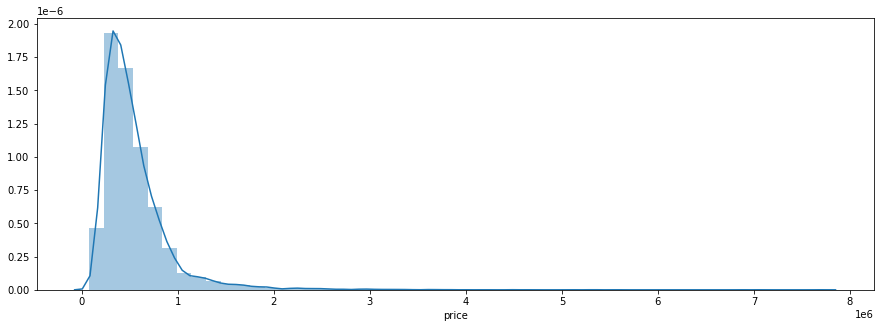

In [36]:
plt.figure(figsize = (15, 5))
sns.distplot(df4['price'])

### 4.1.2 Numerical Variable

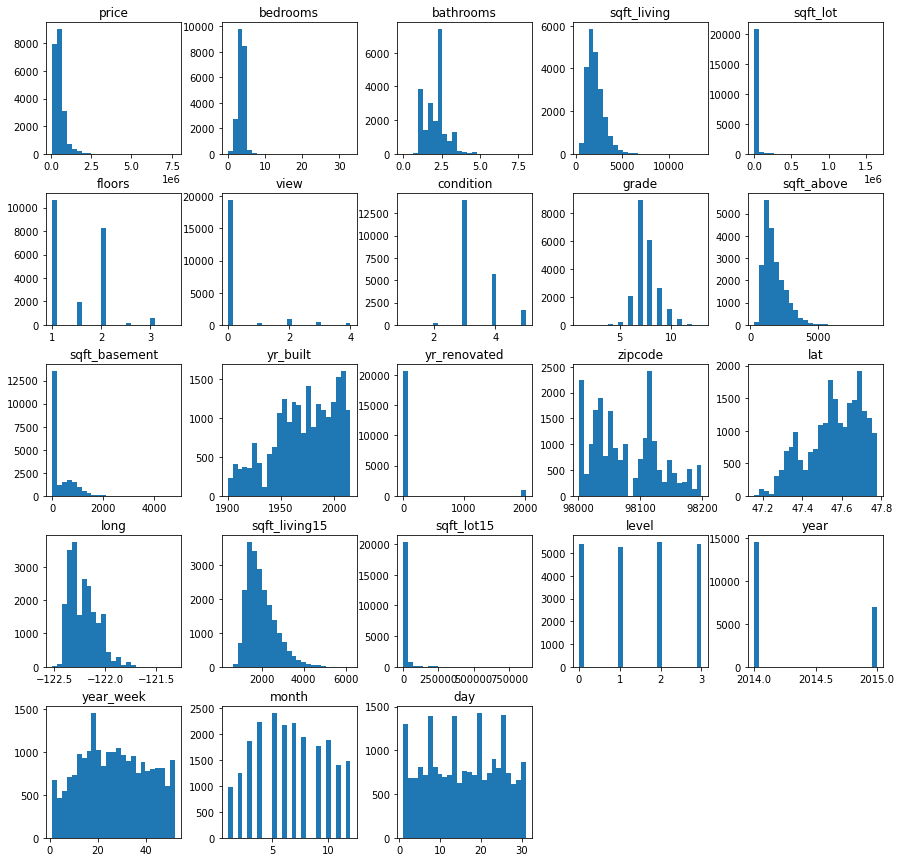

In [37]:
fig = plt.figure(figsize = (15,15))
num_attributes.hist(bins = 25, ax = fig.gca(), grid = False);

In [38]:
descriptive_statistics(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
1,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
2,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
3,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
4,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
5,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
6,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
7,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53
8,grade,1.00,13.00,12.00,7.66,7.00,1.18,0.77,1.19
9,sqft_above,290.00,9410.00,9120.00,1788.39,1560.00,828.07,1.45,3.40


### 4.1.3 Categorical Variable

In [39]:
aux1 = df4[['standard', 'road','neighbourhood', 'city', 'county', 'state', 'year_week', 'date']]
countPlotter(aux1)

Generating Count Plots:   0%|          | 0/8 [00:00<?, ?it/s]

ValueError: num must be 1 <= num <= 8, not 0

<Figure size 1440x1440 with 0 Axes>

### 4.1.4 Binary Variable

<AxesSubplot:xlabel='waterfront', ylabel='count'>

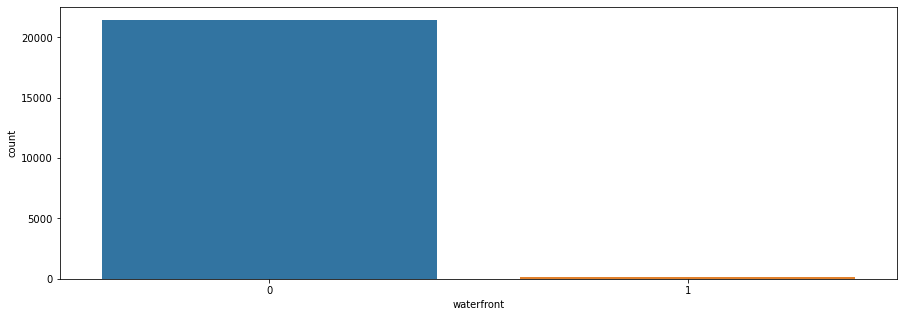

In [42]:
plt.figure(figsize = (15, 5))
sns.countplot(x='waterfront', data = data)

## 4.2 Bivariate Analysis

Generating Group Plots:   0%|          | 0/16 [00:00<?, ?it/s]

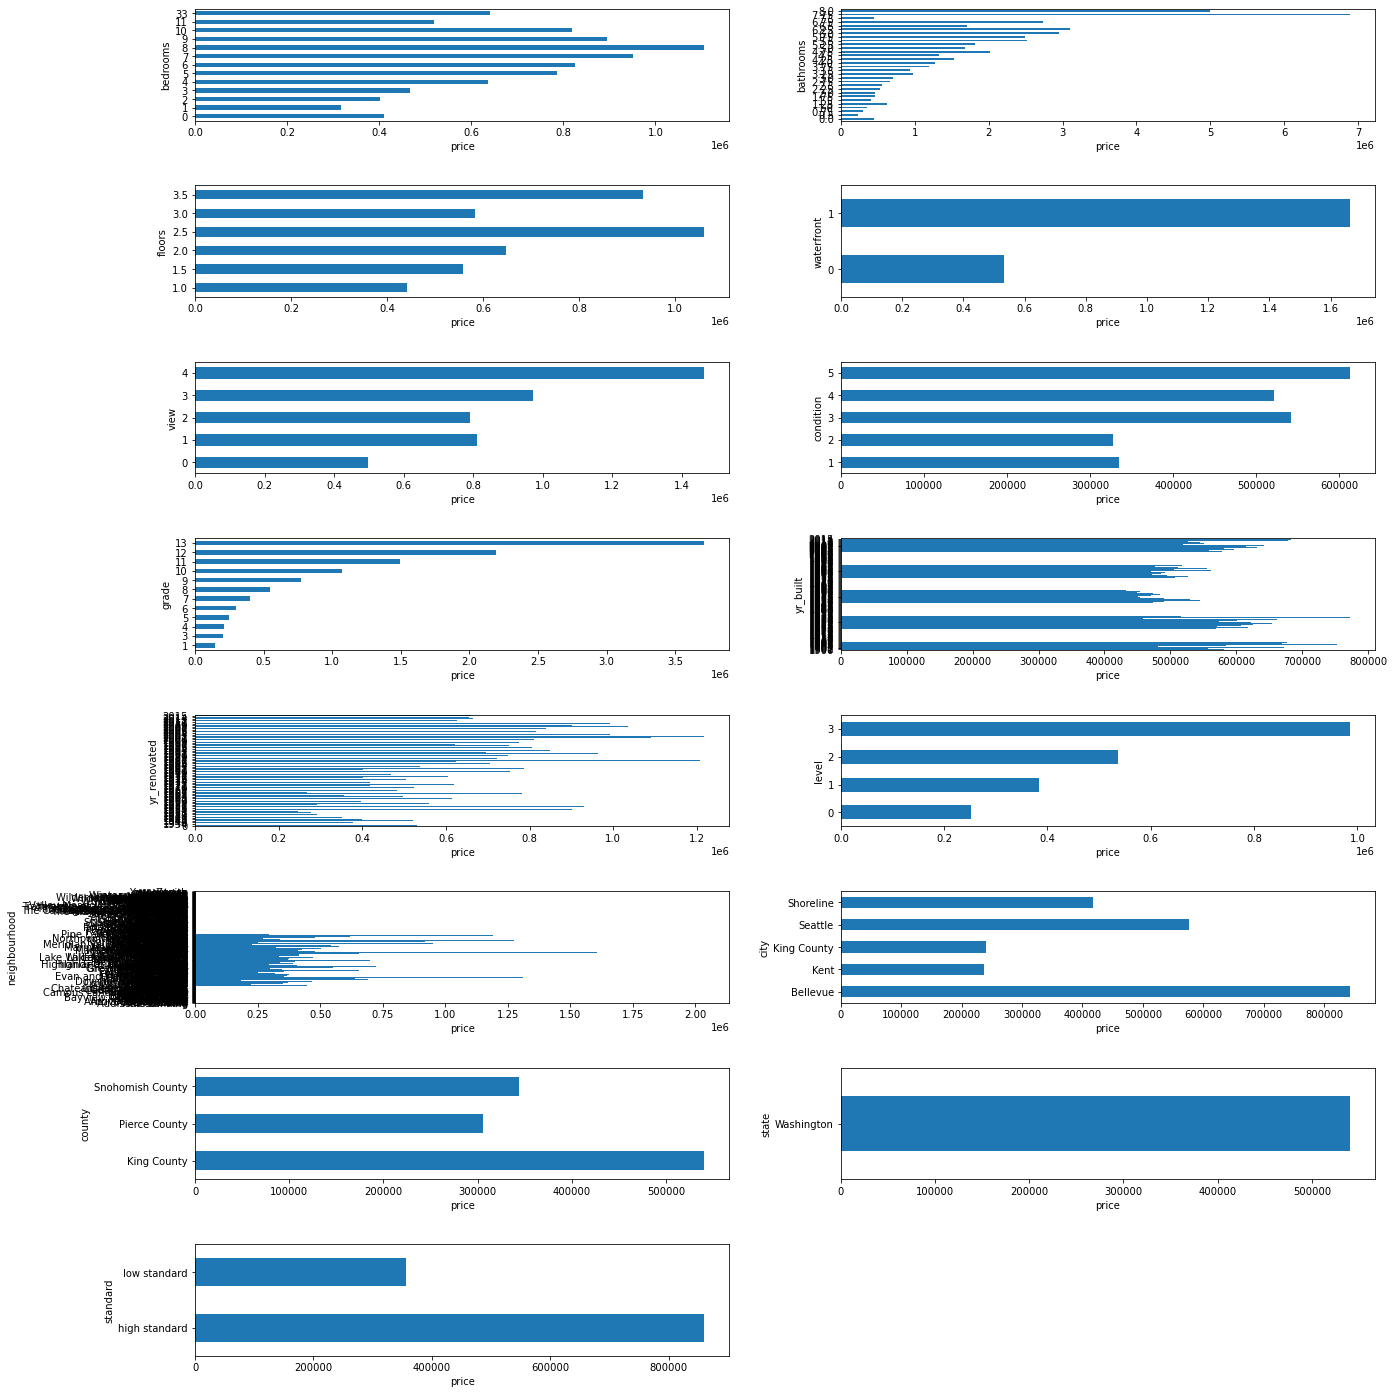

In [43]:
aux2 = df4[['price','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'yr_built', 'yr_renovated', 'level','neighbourhood', 'city', 'county', 'state', 'standard']]

barPlotter(aux2)

## 4.3 Multivariate Analysis

### 4.3.1 Numerical Attributes

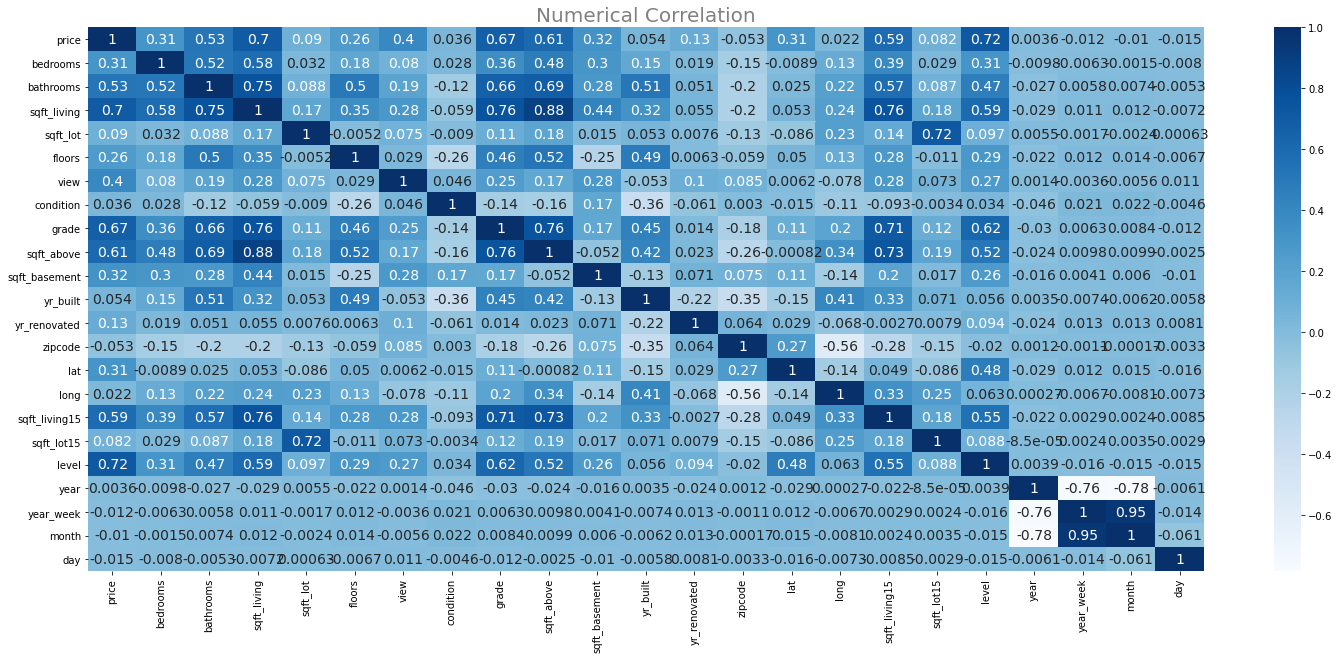

In [44]:
fig = plt.figure(figsize = (25,10))
correlation = num_attributes.corr(method = 'pearson')
sns.heatmap(correlation, annot = True, annot_kws={"fontsize":14}, cmap="Blues");
plt.title("Numerical Correlation", size=20, color='gray');

### 4.3.2 Binary x Numerical Attributes

In [45]:
num_attributes.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'level', 'year', 'year_week', 'month', 'day'],
      dtype='object')

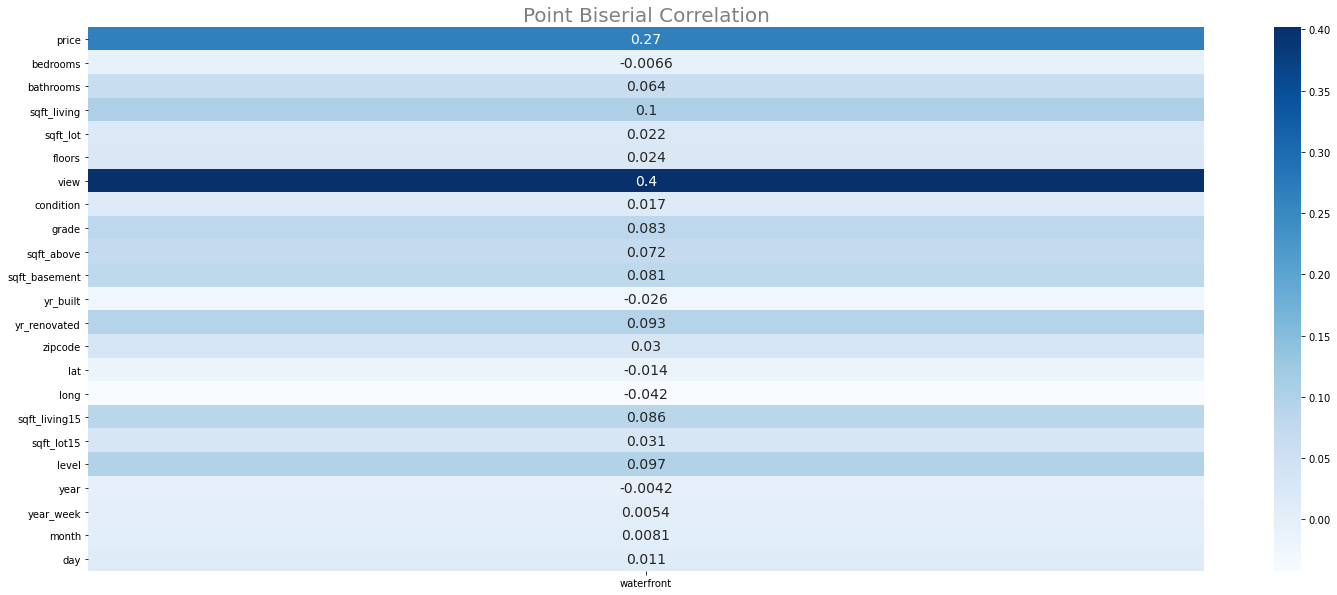

In [46]:
x1 = pointbiserialr(bin_attributes, num_attributes['price'])[0]
x2 = pointbiserialr(bin_attributes, num_attributes['bedrooms'])[0]
x3 = pointbiserialr(bin_attributes, num_attributes['bathrooms'])[0]
x4 = pointbiserialr(bin_attributes, num_attributes['sqft_living'])[0]
x5 = pointbiserialr(bin_attributes, num_attributes['sqft_lot'])[0]
x6 = pointbiserialr(bin_attributes, num_attributes['floors'])[0]
x7 = pointbiserialr(bin_attributes, num_attributes['view'])[0]
x8 = pointbiserialr(bin_attributes, num_attributes['condition'])[0]
x9 = pointbiserialr(bin_attributes, num_attributes['grade'])[0]
x10 = pointbiserialr(bin_attributes, num_attributes['sqft_above'])[0]
x11 = pointbiserialr(bin_attributes, num_attributes['sqft_basement'])[0]
x12 = pointbiserialr(bin_attributes, num_attributes['yr_built'])[0]
x13 = pointbiserialr(bin_attributes, num_attributes['yr_renovated'])[0]
x14 = pointbiserialr(bin_attributes, num_attributes['zipcode'])[0]
x15 = pointbiserialr(bin_attributes, num_attributes['lat'])[0]
x16 = pointbiserialr(bin_attributes, num_attributes['long'])[0]
x17 = pointbiserialr(bin_attributes, num_attributes['sqft_living15'])[0]
x18 = pointbiserialr(bin_attributes, num_attributes['sqft_lot15'])[0]
x19 = pointbiserialr(bin_attributes, num_attributes['level'])[0]
x20 = pointbiserialr(bin_attributes, num_attributes['year'])[0]
x21 = pointbiserialr(bin_attributes, num_attributes['year_week'])[0]
x22 = pointbiserialr(bin_attributes, num_attributes['month'])[0]
x23 = pointbiserialr(bin_attributes, num_attributes['day'])[0]

# Final dataset
d = pd.DataFrame({'waterfront':[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, 
                                x14, x15, x16, x17, x18, x19, x20, x21, x22, x23]})

# Sets the index equal to columns
d = d.set_index(num_attributes.columns)

fig = plt.figure(figsize = (25,10))
sns.heatmap(d, annot = True, annot_kws={"fontsize":14}, cmap="Blues");
plt.title("Point Biserial Correlation", size=20, color='gray');

### 4.3.3 Categorical Attributes

In [47]:
# Only categorical data
a = df4.select_dtypes( include = 'object')

In [48]:
a.columns

Index(['standard', 'road', 'house_number', 'neighbourhood', 'city', 'county',
       'state'],
      dtype='object')

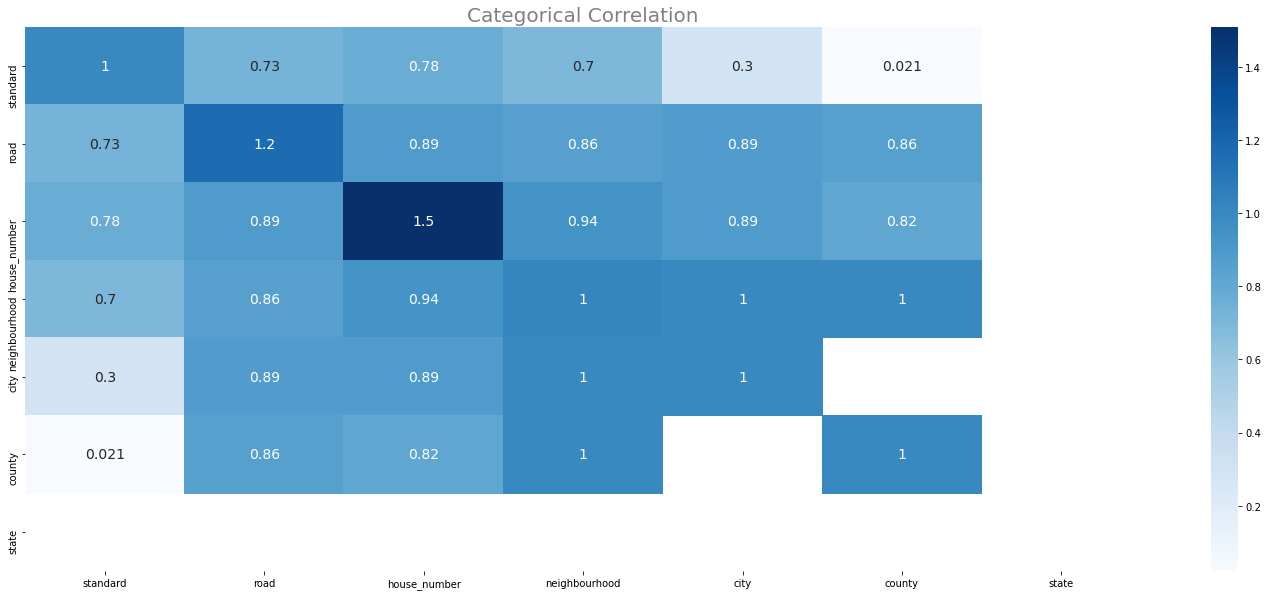

In [49]:
# Calculate cramer v

a1 = cramer_v( a['standard'], a['standard'] )
a2 = cramer_v( a['standard'], a['road'] )
a3 = cramer_v( a['standard'], a['house_number'] )
a4 = cramer_v( a['standard'], a['neighbourhood'] )
a5 = cramer_v( a['standard'], a['city'] )
a6 = cramer_v( a['standard'], a['county'] )
a7 = cramer_v( a['standard'], a['state'] )


a8 = cramer_v( a['road'], a['standard'] )
a9 = cramer_v( a['road'], a['road'] )
a10 = cramer_v( a['road'], a['house_number'] )
a11 = cramer_v( a['road'], a['neighbourhood'] )
a12 = cramer_v( a['road'], a['city'] )
a13 = cramer_v( a['road'], a['county'] )
a14 = cramer_v( a['road'], a['state'] )

a15 = cramer_v( a['house_number'], a['standard'] )
a16 = cramer_v( a['house_number'], a['road'] )
a17 = cramer_v( a['house_number'], a['house_number'] )
a18 = cramer_v( a['house_number'], a['neighbourhood'] )
a19 = cramer_v( a['house_number'], a['city'] )
a20 = cramer_v( a['house_number'], a['county'] )
a21 = cramer_v( a['house_number'], a['state'] )

a22 = cramer_v( a['neighbourhood'], a['standard'] )
a23 = cramer_v( a['neighbourhood'], a['road'] )
a24 = cramer_v( a['neighbourhood'], a['house_number'] )
a25 = cramer_v( a['neighbourhood'], a['neighbourhood'] )
a26 = cramer_v( a['neighbourhood'], a['city'] )
a27 = cramer_v( a['neighbourhood'], a['county'] )
a28 = cramer_v( a['neighbourhood'], a['state'] )

a29 = cramer_v( a['city'], a['standard'] )
a30 = cramer_v( a['city'], a['road'] )
a31 = cramer_v( a['city'], a['house_number'] )
a32 = cramer_v( a['city'], a['neighbourhood'] )
a33 = cramer_v( a['city'], a['city'] )
a34 = cramer_v( a['city'], a['county'] )
a35 = cramer_v( a['city'], a['state'] )

a36 = cramer_v( a['county'], a['standard'] )
a37 = cramer_v( a['county'], a['road'] )
a38 = cramer_v( a['county'], a['house_number'] )
a39 = cramer_v( a['county'], a['neighbourhood'] )
a40 = cramer_v( a['county'], a['city'] )
a41 = cramer_v( a['county'], a['county'] )
a42 = cramer_v( a['county'], a['state'] )

a43 = cramer_v( a['state'], a['standard'] )
a44 = cramer_v( a['state'], a['road'] )
a45 = cramer_v( a['state'], a['house_number'] )
a46 = cramer_v( a['state'], a['neighbourhood'] )
a47 = cramer_v( a['state'], a['city'] )
a48 = cramer_v( a['state'], a['county'] )
a49 = cramer_v( a['state'], a['state'] )

# Final dataset
d = pd.DataFrame( {'standard': [a1, a2, a3, a4, a5, a6, a7],
                   'road': [a8, a9, a10, a11, a12, a13, a14],
                   'house_number': [a15, a16, a17, a18, a19, a20, a21],
                   'neighbourhood': [a22, a23, a24, a25, a26, a27, a28],
                   'city': [a29, a30, a31, a32, a33, a34, a35],
                   'county': [a36, a37, a38, a39, a40, a41, a42],
                   'state': [a43, a44, a45, a46, a47, a48, a49]})

    
d = d.set_index(d.columns)

fig = plt.figure(figsize = (25,10))
sns.heatmap(d, annot = True, annot_kws={"fontsize":14}, cmap="Blues");
plt.title("Categorical Correlation", size=20, color='gray');

# 5.0 DATA PREPARATION

In [50]:
df5 = df4.copy()

In [51]:
df5.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'standard',
       'level', 'year', 'year_week', 'month', 'day', 'road', 'house_number',
       'neighbourhood', 'city', 'county', 'state'],
      dtype='object')

In [52]:
df5.isna().sum()

Unnamed: 0           0
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
standard             0
level                0
year                 0
year_week            0
month                0
day                  0
road               218
house_number      1278
neighbourhood    14394
city             12566
county               0
state                0
dtype: int64

In [53]:
df5.fillna('None', inplace = True)

In [54]:
df5 = df5.drop(columns=['Unnamed: 0'])

## 5.1 Rescaling Features

In [55]:
num_attributes.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'level', 'year', 'year_week', 'month', 'day'],
      dtype='object')

In [56]:
mms = MinMaxScaler()

# numerical variable different from binary
df5[["id", 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','view', 'condition', 'grade', 
     'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
     'sqft_lot15','level', 'year']] = mms.fit_transform( df5[["id", 'bedrooms', 'bathrooms', 'sqft_living', 
                                                              'sqft_lot', 'floors','view', 'condition', 'grade', 
                                                              'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 
                                                              'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
                                                              'level', 'year']])

## 5.2 Features Transformation

### 5.2.1 Encoding

In [57]:
cat_attributes.columns

Index(['date', 'standard', 'road', 'house_number', 'neighbourhood', 'city',
       'county', 'state'],
      dtype='object')

In [58]:
df5['road'] = df5['road'].astype(str)
df5['neighbourhood'] = df5['neighbourhood'].astype(str)
df5['house_number'] = df5['house_number'].astype(str)
df5[['standard','city', 'county', 'state']] = df5[['standard','city', 'county', 'state']].astype(str)

In [59]:
# ONEHOT ENCODING:

onehot = ['city', 'county', 'state']
df5 = pd.get_dummies(df5, columns = onehot, drop_first=True)

# LABEL ENCODING:
le = LabelEncoder()
df5['road'] = le.fit_transform( df5['road'] )
df5['neighbourhood'] = le.fit_transform( df5['neighbourhood'] )
df5['house_number'] = le.fit_transform( df5['house_number'] )

# ORDINAL ENCODING:
# cholesterol
df5["standard"] = df5["standard"].map({"low standard": 0, "high standard": 1})

### 5.2.2 Response Variable Transformation

In [60]:
# Logarithm Transformation
df5['price'] = np.log1p( df5['price'] )

### 5.2.3 Nature Transformations

In [61]:
## Date
df5['date'] = pd.to_datetime( df5['date'] )

## Year
df5['year'] = pd.to_datetime( df5['date'] ).dt.year

## Week
df5['year_week'] = pd.to_datetime( df5['date'] ).dt.isocalendar().week

# Month
df5['month'] = df5['date'].dt.month

# Day
df5['day'] = df5['date'].dt.day

In [62]:
# day
df5['day_sin'] = df5['day'].apply( lambda x: np.sin( x* (2. * np.pi/30 )))
df5['day_cos'] = df5['day'].apply( lambda x: np.cos( x* (2. * np.pi/30 )))

# month
df5['month_sin'] = df5['month'].apply( lambda x: np.sin( x* (2. * np.pi/12 )))
df5['month_cos'] = df5['month'].apply( lambda x: np.cos( x* (2. * np.pi/12 )))

# week of year
df5['year_week_sin'] = df5['year_week'].apply( lambda x: np.sin( x* (2. * np.pi/52 )))
df5['year_week_cos'] = df5['year_week'].apply( lambda x: np.cos( x* (2. * np.pi/52 )))

# 6.0 FEATURE SELECTION

In [63]:
df6 = df5.copy()

## 6.1 Split DataFrame into training and test DataSet


In [64]:
cols_drop = ['day', 'month', 'year_week']
df6 = df6.drop( cols_drop, axis = 1 )

In [65]:
## we will separate the last 6 weeks for testing
df6[['id','date']].groupby('id').max().reset_index()['date'][0] - datetime.timedelta( days = 6*7 )

Timestamp('2015-03-11 00:00:00')

In [66]:
df5['date'].max()

Timestamp('2015-05-27 00:00:00')

In [67]:
# training dataset
X_train = df6[df6['date'] < '2015-03-11']
y_train = X_train['price']

# test dataset
X_test = df6[df6['date'] >= '2015-03-11']
y_test = X_test['price']

print('Training Min date: {}'.format( X_train['date'].min()))
print('Training Max date: {}'.format( X_train['date'].max()))

print('\nTest Min date: {}'.format( X_test['date'].min()))
print('Test Max date: {}'.format( X_test['date'].max()))

Training Min date: 2014-05-02 00:00:00
Training Max date: 2015-03-10 00:00:00

Test Min date: 2015-03-11 00:00:00
Test Max date: 2015-05-27 00:00:00


## 6.2 Boruta as Feature selector

In [68]:
# training and test dataset for boruta
X_train_n = X_train.drop(['price','date'], axis = 1).values
y_train_n = y_train.values.ravel()

# define RandomForestRegressor
rf = RandomForestRegressor( n_jobs = -1 )

# define boruta
boruta = BorutaPy( rf, n_estimators = 'auto', verbose = 2, random_state = 42).fit( X_train_n, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	20
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	2
Reject

### 6.2.1 Best Features from Boruta

In [69]:
cols_selected = boruta.support_.tolist()

# best features
X_train_fs = X_train.drop( ['date', 'price'], axis = 1 )
cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()

# not selected Boruta
cols_not_selected_boruta = list(np.setdiff1d( X_train_fs.columns, cols_selected_boruta ))

In [70]:
cols_selected_boruta

['sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'standard',
 'level',
 'road']

## 6.3 Manual Feature Selection

In [71]:
cols_selected_boruta = ['id',
                        'sqft_living',
                        'sqft_lot',
                        'waterfront',
                        'view',
                        'grade',
                        'sqft_above',
                        'yr_built',
                        'zipcode',
                        'lat',
                        'long',
                        'sqft_living15',
                        'sqft_lot15',
                        'standard',
                        'level',
                        'road']

# columns to add:
feat_to_add = ['price', 'date']

# columns full:
cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend(feat_to_add)

# 7.0 MACHINE LEARNING MODELLING

## 7.1 Seting

In [72]:
x_train = X_train[cols_selected_boruta]
x_test = X_test[cols_selected_boruta]

# Time Series data preparation
x_training = X_train[cols_selected_boruta_full]

## 7.2 Linear Regression


In [73]:
# model
lr = LinearRegression().fit( x_train, y_train )

# prediction
yhat_lr = lr.predict( x_test )

# performance
lr_result = ml_error( 'Linear Regression', np.expm1( y_test ), np.expm1( yhat_lr))
lr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression,78658.81,0.12,182093.64


### 7.2.1 Linear Regression Model - Cross Validation

In [74]:
lr_result_cv = cross_validation( x_training, 5, 'Linear Regression', lr, verbose = False )
lr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,75001.46 +/- 1558.11,0.13 +/- 0.0,167256.13 +/- 9544.63


## 7.3 Linear Regression Regularized Model - Lasso


In [75]:
# model
lrr = Lasso( alpha = 0.01 ).fit( x_train, y_train )

# prediction
yhat_lrr = lrr.predict( x_test )

# performance
lrr_result = ml_error( 'Linear Regression - Lasso', np.expm1( y_test ), np.expm1( yhat_lrr))
lrr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression - Lasso,94886.38,0.13,248827.02


### 7.3.1 Linear Regression Regularized Model - Lasso - Cross Validation

In [76]:
lrr_result_cv = cross_validation( x_training, 5, 'Lasso', lrr, verbose = False )
lrr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Lasso,88762.18 +/- 1669.46,0.14 +/- 0.0,242295.18 +/- 18850.0


## 7.4 Random Forest Regressor

In [77]:
# model
rf = RandomForestRegressor( n_estimators = 100, n_jobs = -1, random_state = 42  ).fit( x_train, y_train )

# prediction
yhat_rf = rf.predict( x_test )

# performance
rf_result = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf))
rf_result

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,54857.93,0.09,123221.63


### 7.4.1 Random Forest Regressor - Cross Validation

In [78]:
rf_result_cv = cross_validation( x_training, 5, 'Random Forest', rf, verbose = True )
rf_result_cv

/nKFold Number: 5
/nKFold Number: 4
/nKFold Number: 3
/nKFold Number: 2
/nKFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest,51232.95 +/- 884.31,0.09 +/- 0.0,118903.75 +/- 3160.27


## 7.5 XGBoost Regressor

In [79]:
# model
model_xgb = xgb.XGBRegressor( objective = 'reg:squarederror',
                              n_estimators = 3000,
                              eta = 0.03,
                              max_depth = 5,
                              subsample = 0.3,
                              colsample_bytee = 0.9,
                              min_child_weight = 8).fit( x_train, y_train )


# prediction
yhat_xgb = model_xgb.predict( x_test )

# performance
xgb_result = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb))
xgb_result

[10:29:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytee } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,52394.52,0.09,108666.04


### 7.5.1 XGBoost Regressor - Cross Validation


In [80]:
xgb_result_cv = cross_validation(x_training, 5, 'XGBoost Regressor', model_xgb, verbose=True)
xgb_result_cv

/nKFold Number: 5
[10:29:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytee } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


/nKFold Number: 4
[10:30:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytee } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


/nKFold Number: 3
[10:30:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytee } might not be used.

  This

,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,48515.5 +/- 1148.1,0.09 +/- 0.0,104596.39 +/- 14391.76


## 7.6 Compare Model's Performance

### 7.6.1 Single Performance


In [81]:
modelling_result = pd.concat( [lr_result, lrr_result, rf_result, xgb_result])
modelling_result.sort_values( 'RMSE' )

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,52394.52,0.09,108666.04
0,Random Forest Regressor,54857.93,0.09,123221.63
0,Linear Regression,78658.81,0.12,182093.64
0,Linear Regression - Lasso,94886.38,0.13,248827.02


### 7.6.2 Real Performance - Cross Validation


In [82]:
modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
modelling_result_cv.sort_values( 'RMSE CV' )

,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,48515.5 +/- 1148.1,0.09 +/- 0.0,104596.39 +/- 14391.76
0,Random Forest,51232.95 +/- 884.31,0.09 +/- 0.0,118903.75 +/- 3160.27
0,Linear Regression,75001.46 +/- 1558.11,0.13 +/- 0.0,167256.13 +/- 9544.63
0,Lasso,88762.18 +/- 1669.46,0.14 +/- 0.0,242295.18 +/- 18850.0


# 8.0 HYPERPARAMETER FINE TUNING


## 8.1 Random Search

In [83]:
#param = {'n_estimators': [1500, 1700, 2500, 3000, 3500],
#         'eta': [0.01, 0.03],
#         'max_depth': [3, 5, 9],
#         'subsample': [0.1, 0.5, 0.7],
#         'colsample_bytree': [0.3, 0.7, 0.9],
#         'min_child_weight': [3, 8, 15]}

#MAX_EVAL = 5

In [84]:
#final_result = pd.DataFrame()

#for i in range( MAX_EVAL ):
#    # choose values for parameters randomly
#    hp = { k: random.sample( v, 1 )[0] for k, v in param.items() }
#    print( hp )
    
#    # model
#    model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
#                                  n_estimators=hp['n_estimators'], 
#                                  eta=hp['eta'], 
#                                  max_depth=hp['max_depth'], 
#                                  subsample=hp['subsample'],
#                                  colsample_bytree=hp['colsample_bytree'],
#                                  min_child_weight=hp['min_child_weight'] )

#    # performance
#    result = cross_validation( x_training, 5, 'XGBoost Regressor', model_xgb, verbose=True )
#    final_result = pd.concat( [final_result, result] )
        
#final_result

## 8.2 Final Model


In [85]:
param_tuned = {'n_estimators': 1500, 
               'eta': 0.03, 
               'max_depth': 3, 
               'subsample': 0.5, 
               'colsample_bytree': 0.3, 
               'min_child_weight': 8}

In [86]:
# model
model_xgb_tuned = xgb.XGBRegressor(objective="reg:squarederror",
                               n_estimators=param_tuned["n_estimators"], 
                               eta=param_tuned["eta"], 
                               max_depth=param_tuned["max_depth"], 
                               subsample=param_tuned["subsample"],
                               colsample_bytee=param_tuned["colsample_bytree"],
                               min_child_weight=param_tuned["min_child_weight"]).fit(x_train, y_train)

# prediction
yhat_xgb_tuned = model_xgb_tuned.predict(x_test)

# performance
xgb_result_tuned = ml_error("XGBoost Regressor", np.expm1(y_test), np.expm1(yhat_xgb_tuned))
xgb_result_tuned

[10:32:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytee } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,54978.81,0.09,115930.81


# 9.0 TRADUCTION AND ERRO'S INTERPRETATION

In [87]:
df9 = X_test[cols_selected_boruta_full]

# rescale
df9["price"] = np.expm1(df9["price"])
df9["predictions"] = np.expm1(yhat_xgb_tuned)
y_pred = np.expm1(yhat_xgb_tuned)

In [94]:
#GETTING ACCURACY


r2_score(df9["price"], df9["predictions"])

0.9010504543531409

## 9.1 Machine Learning Performance

In [90]:
df9["error"] = df9["price"] - df9["predictions"]
df9["error_rate"] = df9["predictions"] / df9["price"]

<AxesSubplot:xlabel='date', ylabel='predictions'>

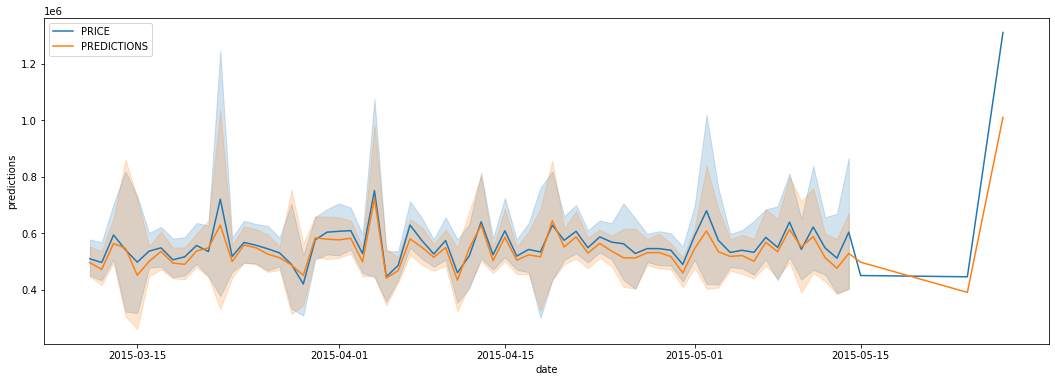

In [92]:
fig = plt.figure(figsize = (18,6))

sns.lineplot(x="date", y="price", data=df9, label="PRICE")
sns.lineplot(x="date", y="predictions", data=df9, label="PREDICTIONS")

# 10.0 MAP

In [ ]:
houses = data[['id', 'lat', 'long', 'price', 'level']].copy()

fig = px.scatter_mapbox(houses, lat ='lat', lon = 'long', color ='level', size = 'price', 
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max = 15, zoom = 10)
fig.update_layout( mapbox_style = 'open-street-map')
fig.update_layout( height = 600, margin = {'r':0, 't':0, 'l':0, 'b':0})
fig.show()

### 4.5 Adding filter options so the person can do their own analysis:
- Filter properties with a water view or not.
- Filter properties down to a certain price value.

In [ ]:
df = data.copy()

In [ ]:
style = {'description_width': 'initial'}

# Iterative buttons
price_limit = widgets.IntSlider( value = 540000, min = 75000, max = 77000000, step = 1,
                                 description = 'Maximum Price', disable = False, style = style)  

df['is_waterfront'] = df['waterfront'].apply( lambda x: 'yes' if x == 1 else 'no')

waterfront_bar = widgets.Dropdown(options = df['is_waterfront'].unique().tolist(),
                                  value = 'yes', description = 'Water View', disable = False)


In [ ]:
widgets.interactive(update_map, df = fixed(df), waterfront = waterfront_bar, limit = price_limit)

# 11.0 DASHBOARD

In [ ]:
import ipywidgets as widgets
from matplotlib import gridspec
from matplotlib import pyplot as plt

In [ ]:
# prepare dataset
#data = pd.read_csv( 'kc_house_data.csv' )

# change date format
#data['year'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y' )
#data['date'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m-%d' )
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%U' )

# Widgets to control data
date_limit = widgets.SelectionSlider(
             options= data['date'].sort_values().unique().tolist(),
             value = '2014-12-01',
             description = 'Disponivel',
             continuous_update=False,
             orientation='horizontal',
             readout=True )



In [ ]:
widgets.interactive( new_map, data=fixed( data ), limit=date_limit)


In [ ]:
fig = plt.figure(figsize=(20, 20))

for i in tqdm_notebook(range(len(data.columns)), desc = 'Generating Frequency Plots'):
    fig.add_subplot(np.ceil(len(data.columns)/5), 5, i+1)
    data.iloc[:, i].hist(bins=20)
    plt.title(data.columns[i])
    fig.tight_layout(pad=3.0)
plt.show();